# PRCP-1003-Customer Transaction Prediction

## Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.
### Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
data=pd.read_csv("train(1).csv")

In [4]:

data.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [5]:
data.shape

(200000, 202)

In [6]:
data["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [7]:
data["ID_code"].value_counts()

train_0         1
train_133350    1
train_133328    1
train_133329    1
train_133330    1
               ..
train_66668     1
train_66669     1
train_66670     1
train_66671     1
train_199999    1
Name: ID_code, Length: 200000, dtype: int64

In [8]:
data=data.drop('ID_code',axis=1)


In [9]:
percentages = data["target"].value_counts(normalize=True).mul(100)
percentages


0    89.951
1    10.049
Name: target, dtype: float64

In [10]:
print(data.columns.tolist())#All columns

['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99',

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [12]:
print(min(data["var_0"].unique()))
print(max(data["var_0"].unique()))


0.4084
20.315


In [13]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [14]:
data.isnull().sum().sort_values(ascending=False)

target     0
var_137    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_72     0
var_199    0
Length: 201, dtype: int64

In [15]:
print(data.nunique())

target          2
var_0       94672
var_1      108932
var_2       86555
var_3       74597
            ...  
var_195     57870
var_196    125560
var_197     40537
var_198     94153
var_199    149430
Length: 201, dtype: int64


In [16]:
data.duplicated().sum()

0

In [17]:
data.dtypes 

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

## EXPLORATORY DATA ANALYSIS

### -Using EDA :Visualize fesatures, insight /observation from the data
### Missing Values
### All The Numerical Variables
### Distribution of the Numerical Variables
### Categorical Variables
### Cardinality of Categorical Variables
### Outliers

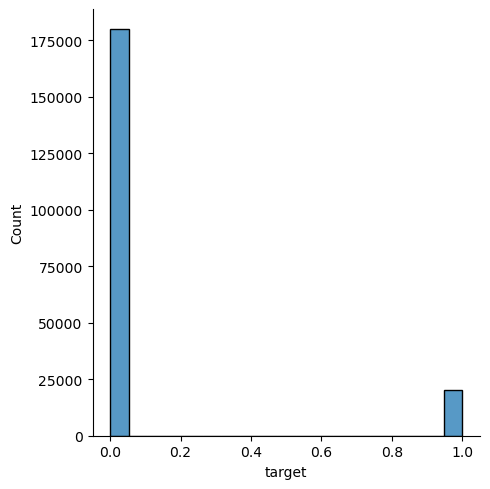

In [18]:
sns.displot(data["target"]) #Inblanced dataset
plt.show()


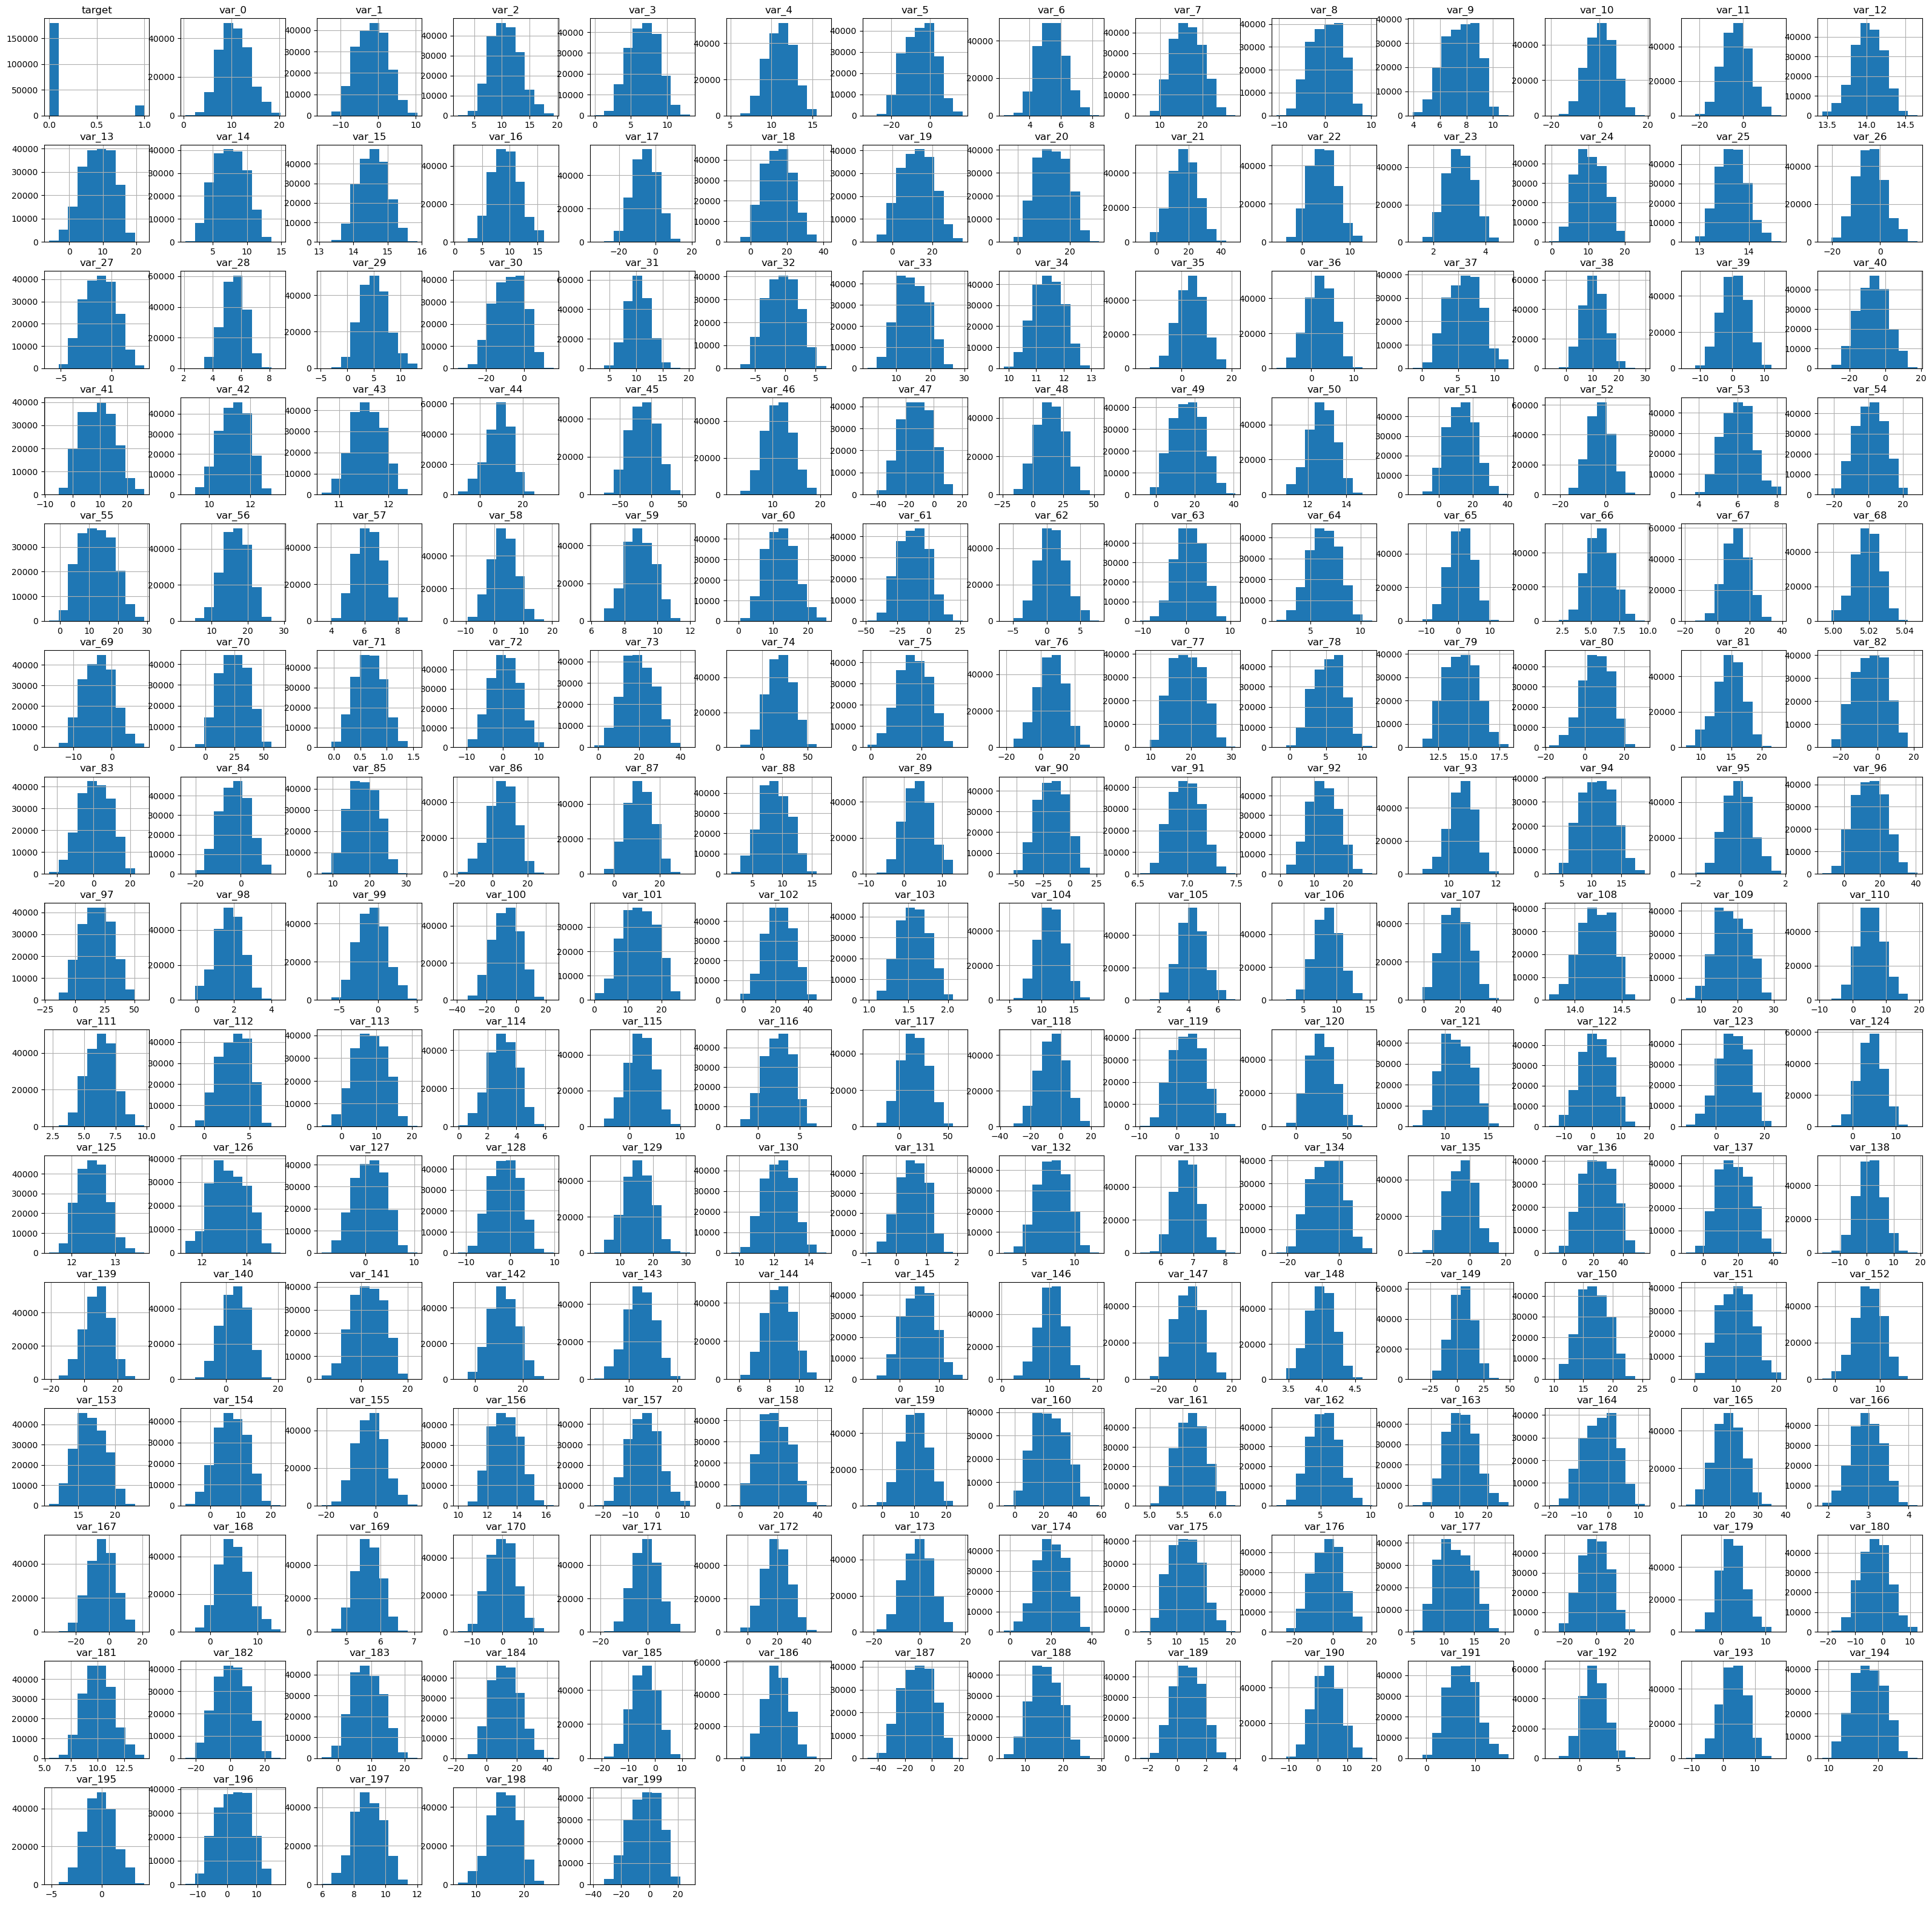

In [19]:

data.hist(figsize=(40,40));

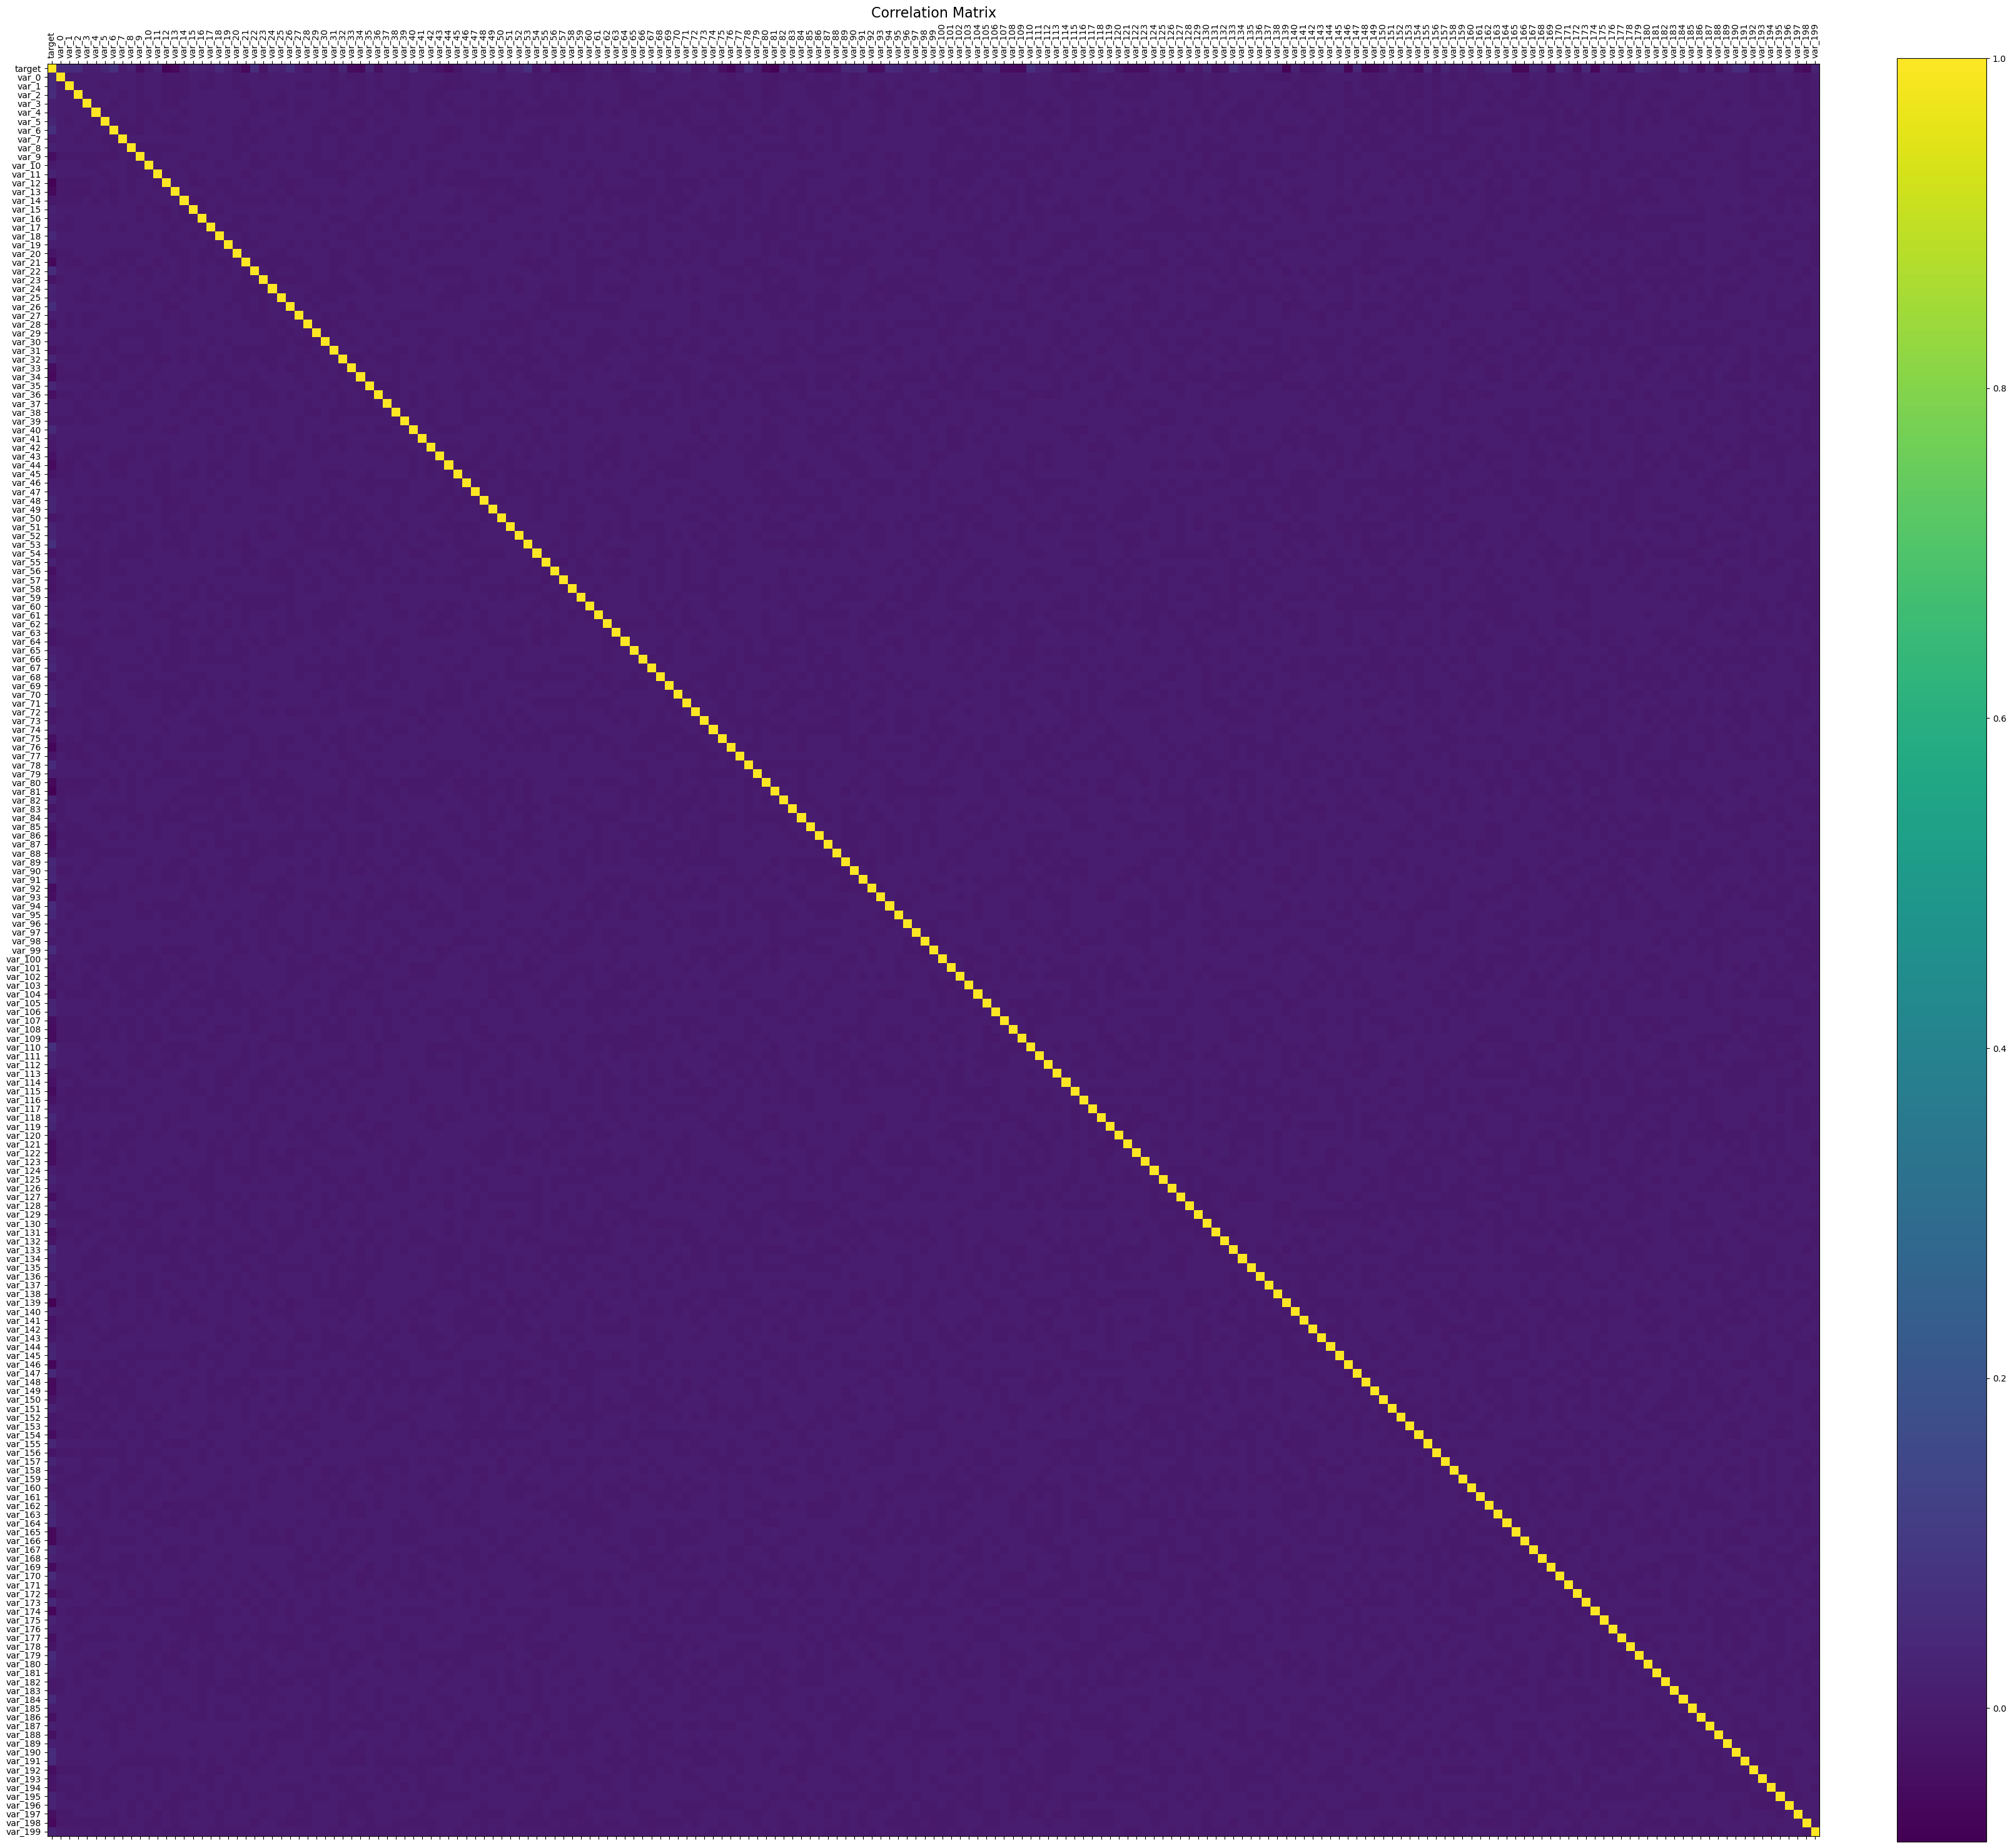

In [20]:
f = plt.figure(figsize=(40, 40))#Correlation matrics
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.yticks(range(data.shape[1]), data.columns)
plt.colorbar(fraction=0.046, pad = 0.04)
plt.title('Correlation Matrix', fontsize=16);


## Check Outlier

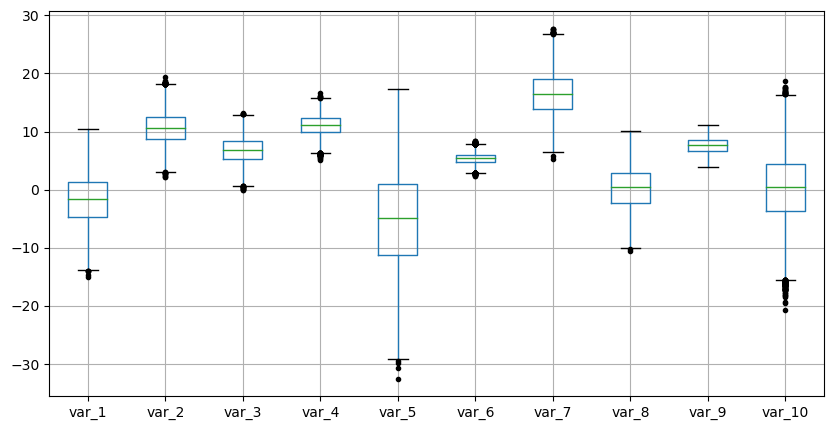

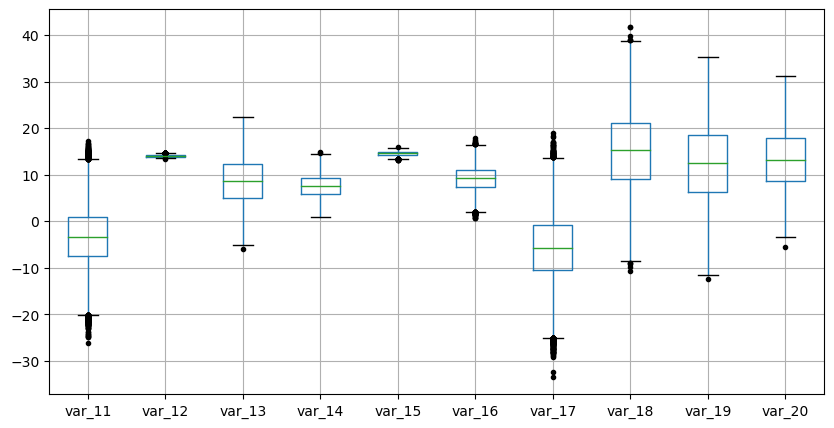

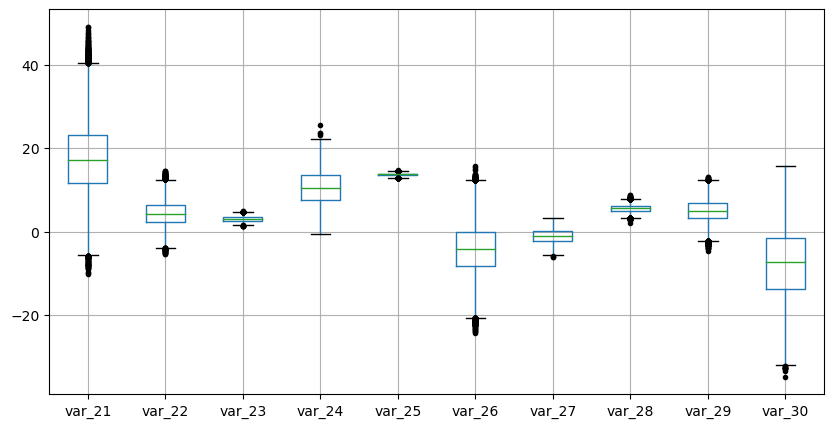

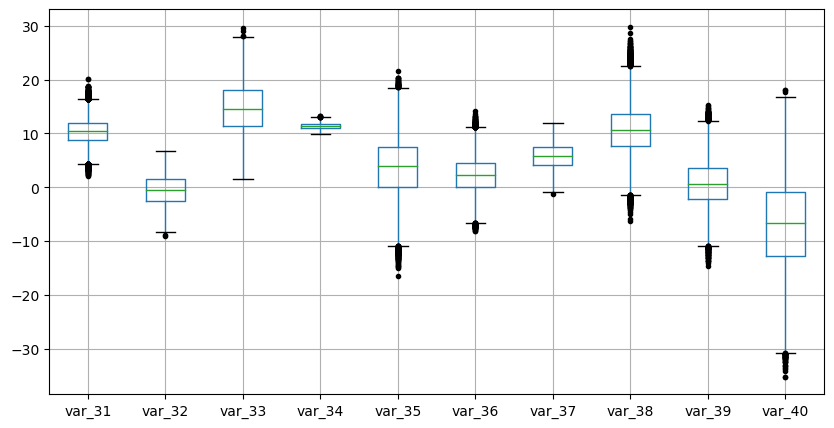

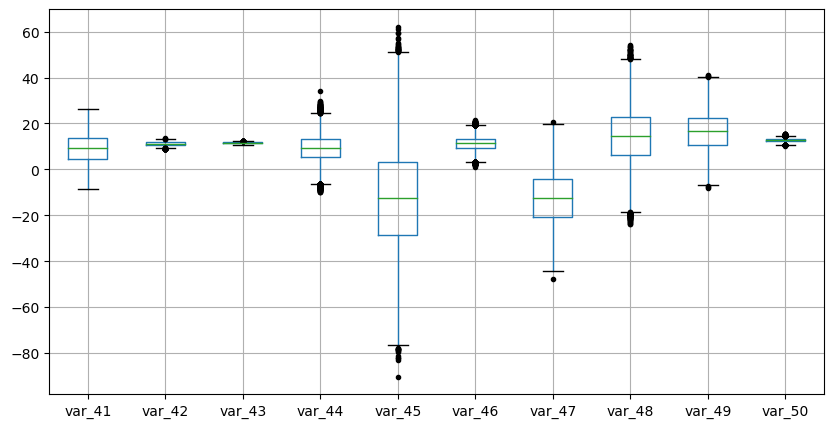

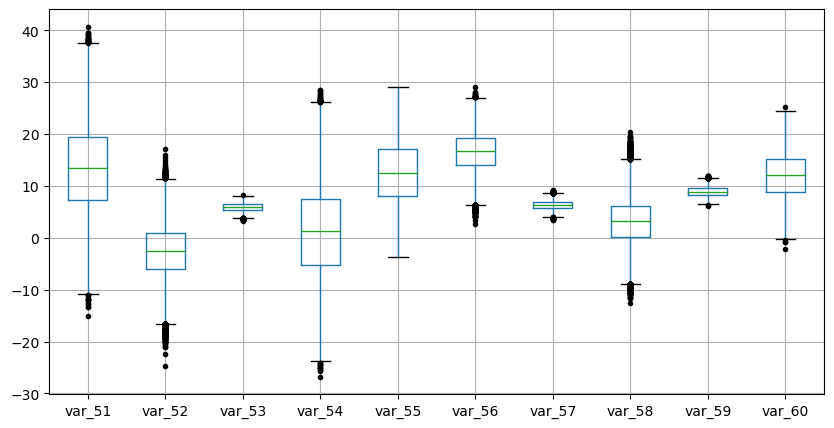

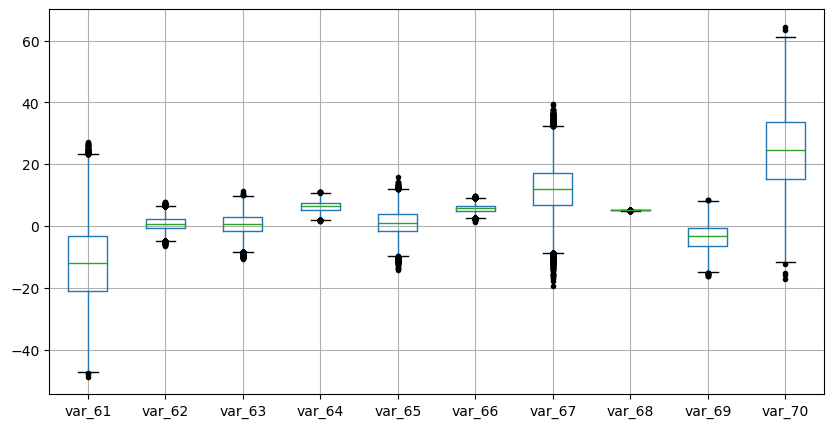

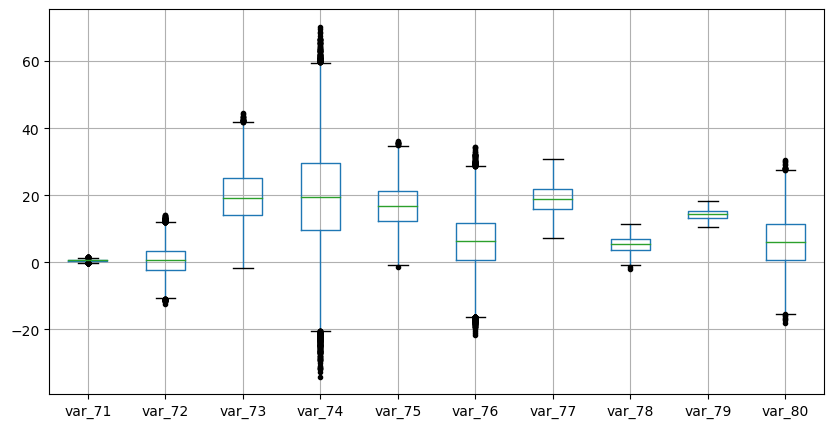

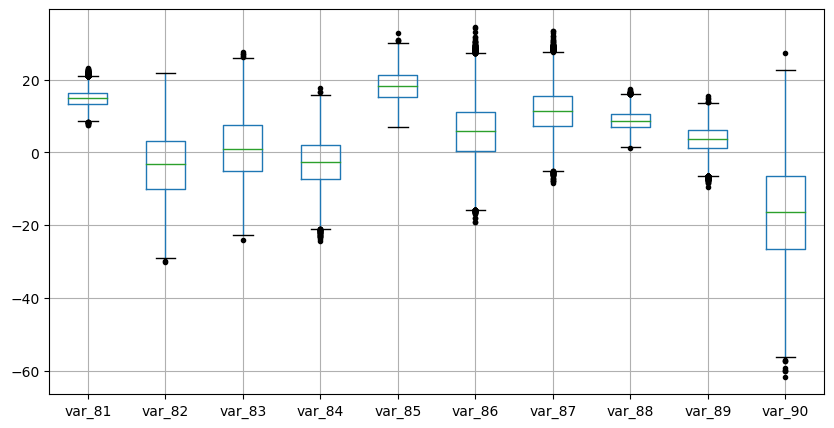

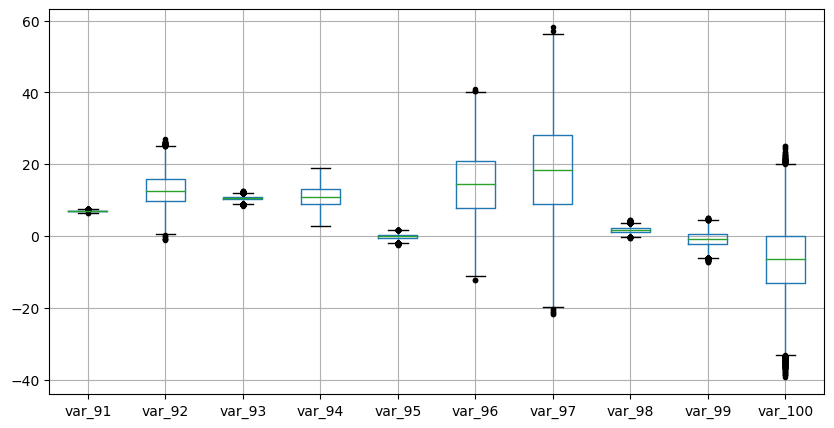

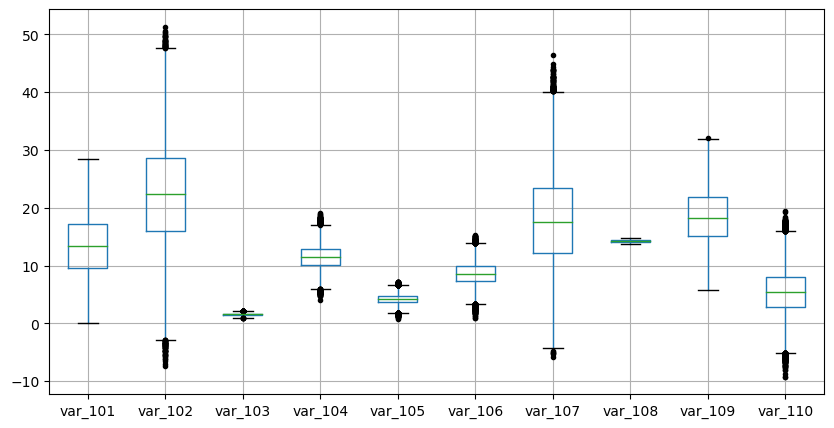

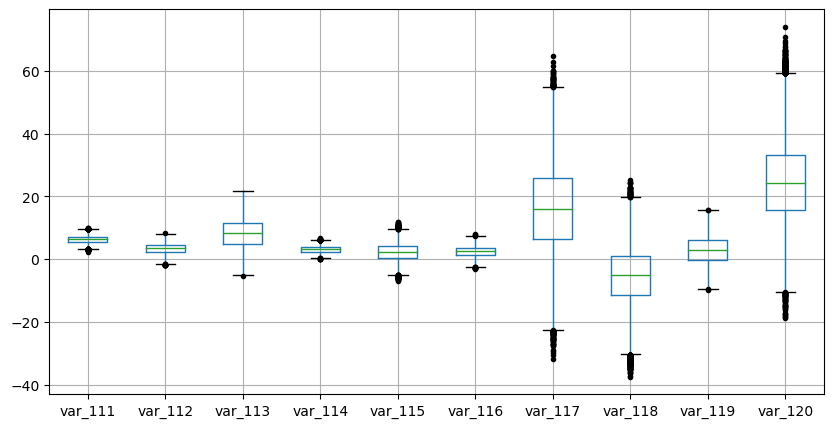

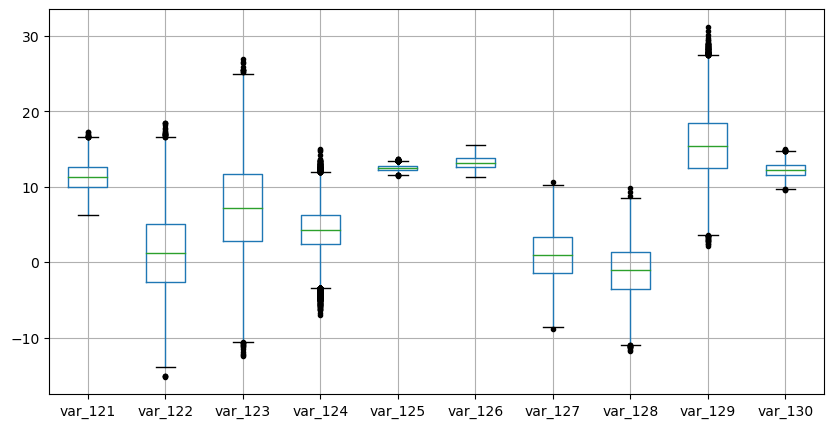

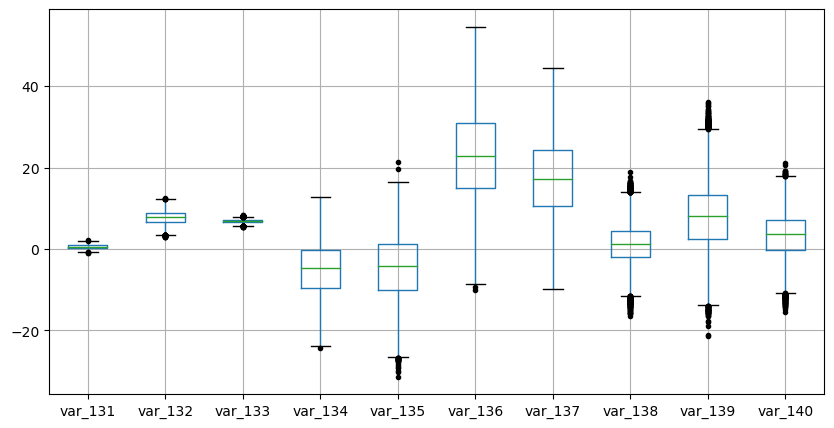

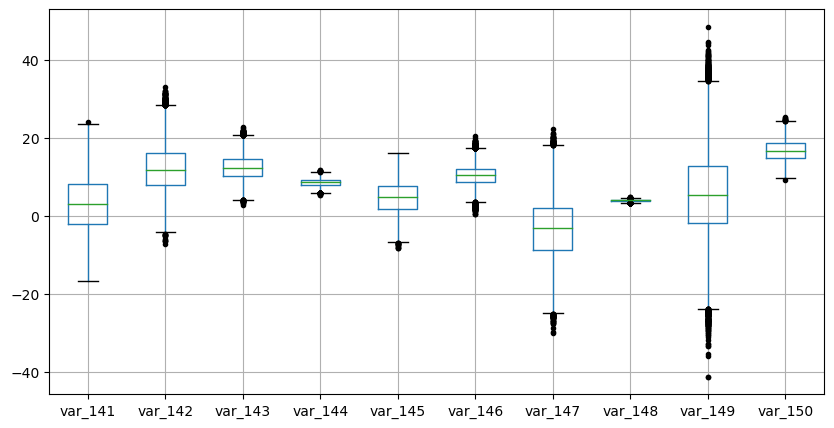

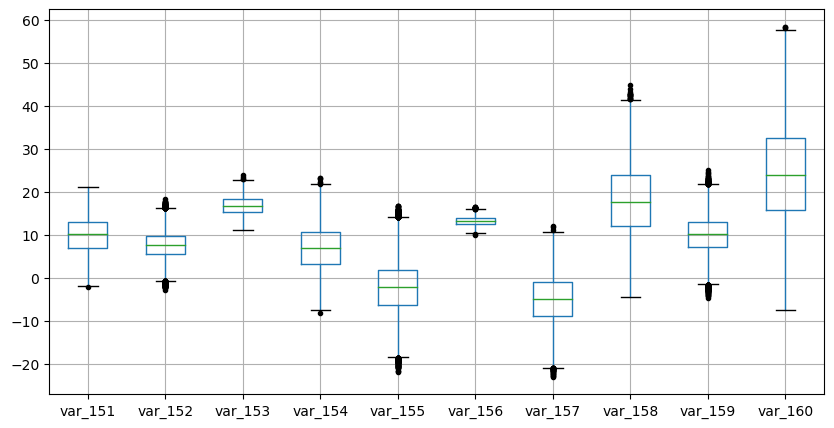

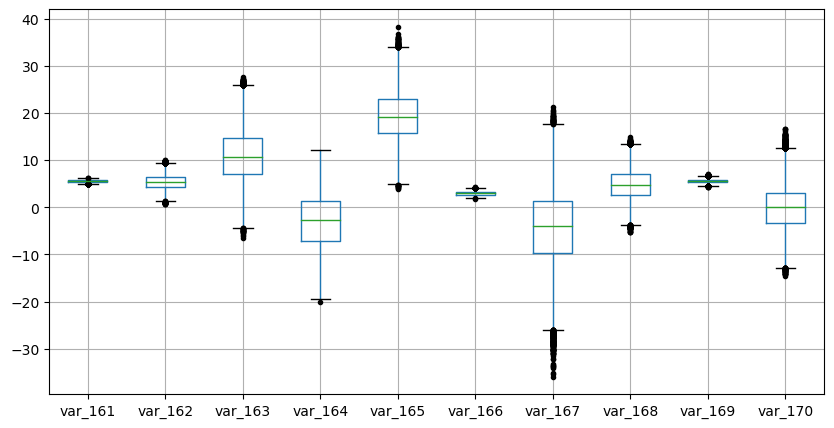

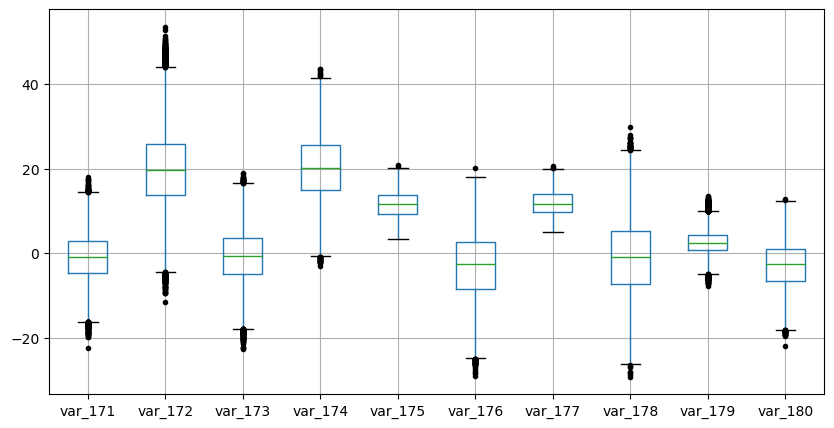

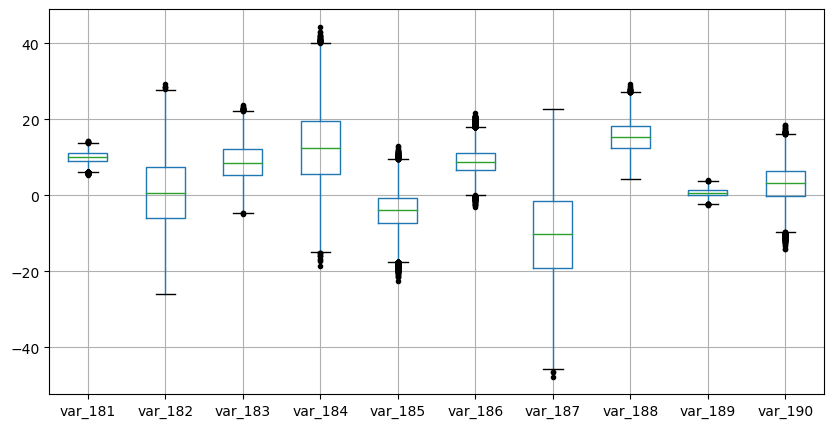

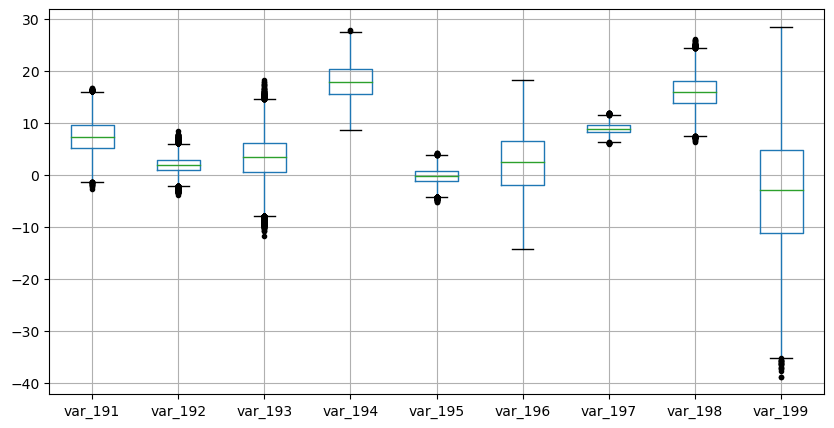

In [21]:

dfcol=list(data.columns)#Data have outlier
variable = dfcol[2:]
n=10
chunks= [variable[x:x+n] for x in range(0,len(variable),n)]
for i in chunks:
    plt.show(data.boxplot(column =i , sym="k.", figsize=(10,5)))

### Split Train and test

In [22]:

X,y=data.drop('target',axis=1),data['target']


In [23]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


### Model prediction

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50,shuffle=True)

### Artificial Neural Network

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout
import gc


In [27]:
classes=1
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(200,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(classes,activation='sigmoid'))


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Evaluating the models

In [29]:
history=model.fit(X_train,y_train,batch_size=2000 ,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15


70/70 [==============================] - 3s 17ms/step - loss: 0.3711 - accuracy: 0.8907 - val_loss: 0.3188 - val_accuracy: 0.8998
Epoch 2/15
70/70 [==============================] - 1s 10ms/step - loss: 0.3062 - accuracy: 0.8993 - val_loss: 0.2905 - val_accuracy: 0.9008
Epoch 3/15
70/70 [==============================] - 1s 10ms/step - loss: 0.2824 - accuracy: 0.9014 - val_loss: 0.2719 - val_accuracy: 0.9042
Epoch 4/15
70/70 [==============================] - 1s 9ms/step - loss: 0.2685 - accuracy: 0.9045 - val_loss: 0.2629 - val_accuracy: 0.9054
Epoch 5/15
70/70 [==============================] - 1s 10ms/step - loss: 0.2621 - accuracy: 0.9060 - val_loss: 0.2615 - val_accuracy: 0.9065
Epoch 6/15
70/70 [==============================] - 1s 9ms/step - loss: 0.2577 - accuracy: 0.9073 - val_loss: 0.2567 - val_accuracy: 0.9070
Epoch 7/15
70/70 [==============================] - 1s 10ms/step - loss: 0.2558 - accuracy: 0.9076 - val_loss: 0.2536 - val_accuracy: 0.9081
Epoch 8/15
70

In [30]:
sc_train = model.evaluate(X_train,y_train,verbose=0)
print('Accuracy',sc_train)


Accuracy [0.24560664594173431, 0.9107214212417603]


In [31]:
y_predict = model.predict(X_test) #X_test prediction
y_predict = (y_predict > 0.5)#Treshold
y_predict = y_predict.astype (int)


1875/1875 [==============================] - 5s 2ms/step


In [32]:
y_predict_ = model.predict(X_train)
y_predict_= (y_predict_> 0.5)
y_predict_= y_predict_.astype (int)


4375/4375 [==============================] - 11s 2ms/step


In [33]:
score1=accuracy_score(y_predict,y_test)#
score2=accuracy_score(y_predict_,y_train)
print("Test Accuracy : " ,score1)#Test Acuracy
print("Traning Accuracy : ",score2)#Tranning Accuracy

Test Accuracy :  0.9106166666666666
Traning Accuracy :  0.9107214285714286


In [34]:
print(classification_report(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.99      0.92      0.95     58427
           1       0.18      0.71      0.29      1573

    accuracy                           0.91     60000
   macro avg       0.59      0.81      0.62     60000
weighted avg       0.97      0.91      0.94     60000



### Model accuracy and loss

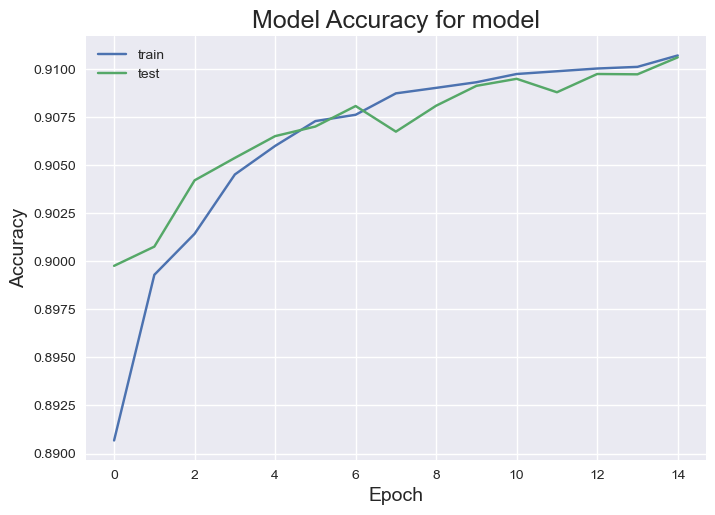

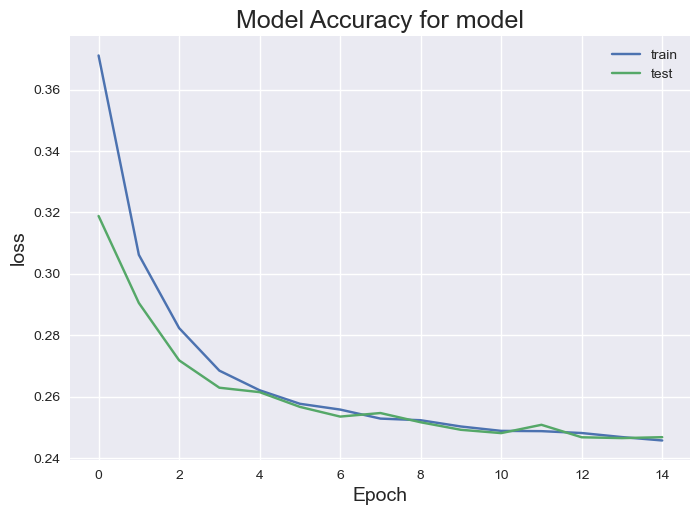

In [35]:
plt.style.use('seaborn')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.title('Model Accuracy for model', fontsize = 18)
plt.legend(['train','test'])
plt.show()
plt.style.use('seaborn')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.title('Model Accuracy for model', fontsize = 18)
plt.legend(['train','test'])
plt.show()


## Logistic Regression and Gaussian Naive Bayes

In [36]:
np.random.seed(42)
models = {"Logistic Regression":LogisticRegression(),
 "Gaussian Naive Bayes":GaussianNB()
 }
results = dict()
for model in models:
    print("Fitting {}...".format(model), end = " ")
    scores = cross_val_score(models[model], X, y, cv=10, scoring = "roc_auc", n_jobs = -1)
    results[model] = scores
    score = scores.mean()
print("Done! Mean AUC score: {}".format(score))

Fitting Logistic Regression... Fitting Gaussian Naive Bayes... Done! Mean AUC score: 0.8884586892484954


# Insight

#### We have three different types of models for example: ANN, Logistics Regression, Gaussian naive bayes.
#### When you use Logistics regression, you will get 84% accuracy.
#### When you use Gaussian Naive Bayes, you will get 88% accuracy.
#### When you use Artificial Neural Network, you will get 91% accuracy.

# Challange

#### 1) We have a large dataset, it becomses difficult to perform EDA on it 
#### 2) There are many outlier in our data so we can't delete the data beacause if the data is deleted then the important information may be deleted.This was one of the most challenging tasks among them. 
#### 3) I performed many algoritms on this but it didn't execute as it was data is so complex and model not capture the hideen pattern I used the following technique
1) When i didn't get outlier showing up using the regular method.then i used for loop 2) As usual i used all algorithm but i did't get good accuracy then I used an ANN model as we did not get good accuracy beacause our data was complex

# Final conclusion
##### All over project we used so many technique For Example- Find relation between various feature ,Basic checks, show outlier, check missing value,Perform EDA,find best feature using Cross-validation and train_test_split, model evaluation etc..

##### We got good accuracy with two model 1) Artificial Neural Network(ANN) 2) Gaussian Naive Bayes
##### ANN have 91% Accuracy so this is best model for production like that we soveld Customer transaction pred